# Simulación de Difusión de Calor en una Barra 1D con Movimiento Sinusoidal de la Fuente

Resumen
Este proyecto presenta una simulación de la transferencia de calor en una barra unidimensional, donde una fuente de calor se mueve sinusoidalmente a lo largo de la barra. La animación generada ilustra cómo el calor se distribuye a lo largo de la barra en función del tiempo, mostrando el efecto del movimiento de la fuente de calor en la distribución de temperatura.

Introducción
La simulación se centra en el estudio de la difusión de calor en una barra unidimensional, un problema fundamental en la termodinámica y la transferencia de calor. Se introduce un modelo que incorpora una fuente de calor que se mueve sinusoidalmente a lo largo de la barra, permitiendo explorar cómo este movimiento afecta la distribución de temperatura en la barra. La animación resultante proporciona una visualización clara de cómo el calor se dispersa y se acumula en respuesta al movimiento de la fuente.

**Modelo matemático**

En este proyecto, se modela la transferencia de calor en una barra unidimensional usando la ecuación de calor. El modelo se basa en la ecuación diferencial que describe cómo cambia la temperatura en un punto de la barra a lo largo del tiempo.

**Ecuación de calor**

La ecuación de calor es una ecuación diferencial parcial que describe cómo la temperatura 𝑢 en una barra cambia en el tiempo y el espacio. En una barra unidimensional, la ecuación se expresa como:

- Cambio de temperatura con el tiempo: La temperatura en un punto específico de la barra cambia con el tiempo. Este cambio es influenciado por la difusión del calor a través de la barra.

- Difusión del calor en el espacio: La difusión del calor a lo largo de la barra es proporcional al gradiente de temperatura. A medida que el calor se mueve de regiones calientes a regiones frías, la temperatura en cualquier punto de la barra tiende a igualarse.

La ecuación de calor se puede entender como una relación entre el cambio de temperatura en el tiempo y el cambio de temperatura en el espacio. En términos simples:

- Cambio temporal: La tasa de cambio de la temperatura en un punto de la barra depende de la diferencia de temperatura entre ese punto y sus vecinos cercanos.

- Difusión espacial: La manera en que el calor se difunde a lo largo de la barra se describe por la relación entre la temperatura en un punto y las temperaturas en los puntos adyacentes.

**Implementación numérica**

Para simular este proceso en la computadora, se utiliza un método de diferencias finitas. Este método implica discretizar la barra y el tiempo en una malla:

- Discretización espacial:** La barra se divide en segmentos pequeños, y la temperatura se calcula en cada uno de estos segmentos.

- Discretización temporal: El tiempo se divide en pequeños intervalos, y se calcula cómo la temperatura cambia en cada intervalo.

Se aplica un esquema numérico para actualizar la temperatura en cada punto de la barra en función de las temperaturas en los puntos adyacentes y en el tiempo anterior. Esta actualización se realiza repetidamente para simular la evolución del sistema de calor.

**Fuente de calor móvil**

Se introduce una fuente de calor que se mueve sinusoidalmente a lo largo de la barra. Esto significa que:

- Fuente de calor dinámica: En lugar de estar fija en una posición, la fuente de calor cambia su ubicación a lo largo de la barra siguiendo una trayectoria sinusoidal.

- Efecto en la temperatura: La fuente de calor aumenta localmente la temperatura en la posición en la que se encuentra, y este efecto se propaga a lo largo de la barra, afectando la distribución de temperatura en función del tiempo.

Este modelo permite explorar cómo la temperatura en la barra cambia en respuesta a la fuente de calor en movimiento, proporcionando una visualización clara de la transferencia de calor en un sistema dinámico.










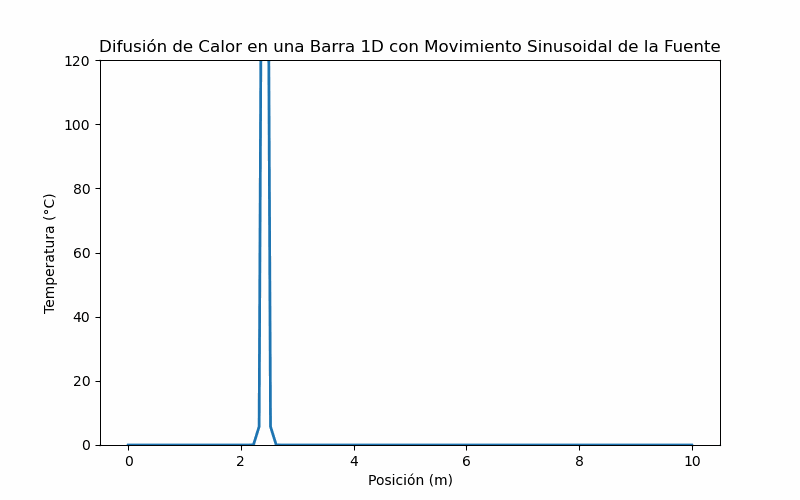

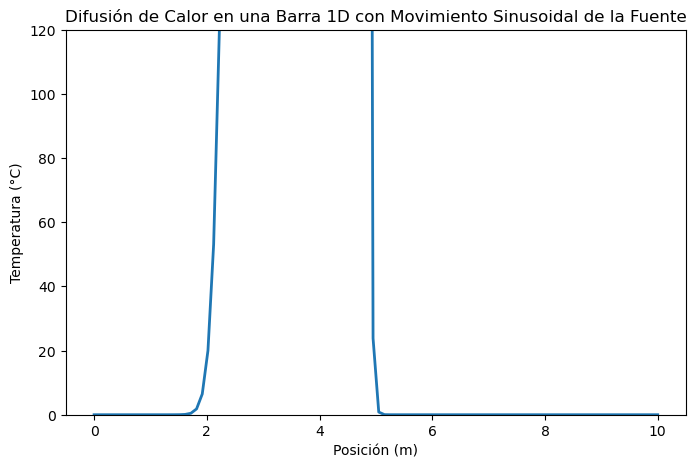

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

# Parámetros de la simulación
L = 10.0              # Longitud de la barra (m)
Nx = 100              # Número de puntos en la malla
dx = L / (Nx - 1)     # Tamaño del paso espacial
alpha = 0.01          # Difusividad térmica (m^2/s)
dt = 0.01             # Paso de tiempo (s)
Nt = 200              # Número de pasos de tiempo
freq = 0.1            # Frecuencia del movimiento sinusoidal de la fuente (Hz)
amplitude = L / 2     # Amplitud del movimiento sinusoidal

# Inicializar la malla espacial y el vector de temperatura
x = np.linspace(0, L, Nx)
u = np.zeros(Nx)

# Configurar la figura para la animación
fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot(x, u, lw=2)
ax.set_ylim(0, 120)
ax.set_xlabel('Posición (m)')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Difusión de Calor en una Barra 1D con Movimiento Sinusoidal de la Fuente')

def update(frame):
    global u
    
    # Calcular la posición de la fuente de calor usando una función sinusoidal
    source_pos = amplitude * (np.sin(2 * np.pi * freq * frame * dt) + 1) / 2
    
    # Crear una copia de u para la actualización
    u_new = np.copy(u)
    
    # Aplicar la ecuación de calor usando el método de diferencias finitas
    for i in range(1, Nx - 1):
        u_new[i] = u[i] + alpha * dt / dx**2 * (u[i+1] - 2 * u[i] + u[i-1])
    
    # Aplicar la fuente de calor en la posición actual
    source_index = int(source_pos / dx)
    if 0 <= source_index < Nx:
        u_new[source_index] += 100  # Añadir un pico de calor
    
    u[:] = u_new
    
    # Actualizar la línea de la animación
    line.set_ydata(u)
    return line,

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=Nt, blit=True, interval=50)

# Guardar la animación como un archivo GIF
gif_path = 'heat_diffusion_animation.gif'
writer = PillowWriter(fps=20)
ani.save(gif_path, writer=writer)

# Mostrar el archivo GIF en el notebook
from IPython.display import Image
Image(filename=gif_path)



**Conclusiones**

La simulación permite observar cómo la temperatura se distribuye a lo largo de la barra bajo la influencia de una fuente de calor en movimiento. Los resultados muestran que:
La temperatura en la barra aumenta localmente en la posición de la fuente de calor, y su efecto se propaga a lo largo de la barra con el tiempo.
El movimiento sinusoidal de la fuente genera un patrón dinámico en la distribución de temperatura, evidenciando cómo la temperatura cambia en respuesta al movimiento de la fuente.
La animación proporciona una visualización efectiva de cómo la transferencia de calor es afectada por la dinámica de la fuente de calor, permitiendo una mejor comprensión del comportamiento del sistema bajo condiciones variables.
Esta simulación no solo ilustra los principios de la difusión de calor, sino que también ofrece una herramienta útil para explorar el impacto de condiciones dinámicas en la transferencia de calor.